# R Notebook

In [1]:
# Required libraries
library(reshape2)
library(Hmisc)
library(ggplot2)

#prepare word seg data
summary <- read.csv("summary.csv")

#summary for younger
younger <- subset(summary, age_group==1)

#summary for older
older <- subset(summary, age_group==2)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



In [2]:
head(younger)

,X,participant,age_group,condition,non_w_s_2_v_1,order_TP33_s_2_v_1,part_w_s_2_v_1,three_1nov_1cong_s_2_v_1,three_2nov_1cong_1incong_s_2_v_1,three_2nov_2cong_s_2_v_1,⋯,three_2nov_1cong_1incong_s_2_v_all,three_2nov_2cong_s_2_v_all,grand_total_s_2_v_all,non_w_s_1_v_1,order_TP33_s_1_v_1,part_w_s_1_v_1,three_1nov_1cong_s_1_v_1,three_2nov_1cong_1incong_s_1_v_1,three_2nov_2cong_s_1_v_1,grand_total_s_1_v_1
1,0,101,1,QW,NA,NA,NA,NA,NA,NA,⋯,0.666666666667,0.666666666667,0.666666666667,0.375,0.666666666667,0.25,0.333333333333,0.6,0.5,0.447368421053
2,1,102,1,QW,0.75,0.333333333333,0.75,1,0.5,0.333333333333,⋯,0.5,0.333333333333,0.641025641026,NA,NA,NA,NA,NA,NA,NA
3,2,103,1,QW,0.25,0.5,0.5,0.555555555556,0.666666666667,0.5,⋯,0.666666666667,0.5,0.487179487179,NA,NA,NA,NA,NA,NA,NA
4,3,104,1,QW,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,4,105,1,QW,NA,NA,NA,NA,NA,NA,⋯,0.666666666667,0.833333333333,0.5625,0.875,0.333333333333,1,0.666666666667,0.5,0.5,0.641025641026
6,5,106,1,QW,NA,NA,NA,NA,NA,NA,⋯,0.5,0.166666666667,0.565217391304,0.875,0.666666666667,0.75,0.555555555556,0.666666666667,0.666666666667,0.692307692308


In [3]:
head(older)

,X,participant,age_group,condition,non_w_s_2_v_1,order_TP33_s_2_v_1,part_w_s_2_v_1,three_1nov_1cong_s_2_v_1,three_2nov_1cong_1incong_s_2_v_1,three_2nov_2cong_s_2_v_1,⋯,three_2nov_1cong_1incong_s_2_v_all,three_2nov_2cong_s_2_v_all,grand_total_s_2_v_all,non_w_s_1_v_1,order_TP33_s_1_v_1,part_w_s_1_v_1,three_1nov_1cong_s_1_v_1,three_2nov_1cong_1incong_s_1_v_1,three_2nov_2cong_s_1_v_1,grand_total_s_1_v_1
27,26,305,2,90Nap,NA,NA,NA,NA,NA,NA,⋯,0.833333333333,0.166666666667,0.520833333333,0.625,0.5,0.5,0.5,0.6,0.333333333333,0.513513513514
28,27,307,2,pilot,0.625,0.333333333333,0.75,0.444444444444,0.5,0.5,⋯,0.5,0.5,0.512820512821,NA,NA,NA,NA,NA,NA,NA
29,28,308,2,QW,0.142857142857,0.333333333333,0.333333333333,0.666666666667,0.666666666667,0.5,⋯,0.666666666667,0.5,0.459459459459,NA,NA,NA,NA,NA,NA,NA
30,29,309,2,pilot,0.714285714286,0.666666666667,0,0.777777777778,0.333333333333,0.666666666667,⋯,0.333333333333,0.666666666667,0.611111111111,NA,NA,NA,NA,NA,NA,NA
31,30,310,2,pilot,NA,NA,NA,NA,NA,NA,⋯,0.333333333333,0.5,0.333333333333,NA,NA,NA,NA,NA,NA,NA
32,31,312,2,pilot,0.571428571429,0.833333333333,1,0.444444444444,0.4,0.666666666667,⋯,0.4,0.666666666667,0.611111111111,NA,NA,NA,NA,NA,NA,NA


# AGE AND SESSION AND VERSION

## Non Words Percent Correct

In [4]:
wordseg.m <- melt(summary,id.vars='age_group', measure.vars=c('non_w_s_1_v_1','non_w_s_1_v_2','non_w_s_2_v_1','non_w_s_2_v_2'))

head(wordseg.m)

,age_group,variable,value
1,1,non_w_s_1_v_1,0.375
2,1,non_w_s_1_v_1,NA
3,1,non_w_s_1_v_1,NA
4,1,non_w_s_1_v_1,NA
5,1,non_w_s_1_v_1,0.875
6,1,non_w_s_1_v_1,0.875


### Accuracy by Sess and Vers

Warning message:
: Removed 96 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 96 rows containing missing values (geom_point).

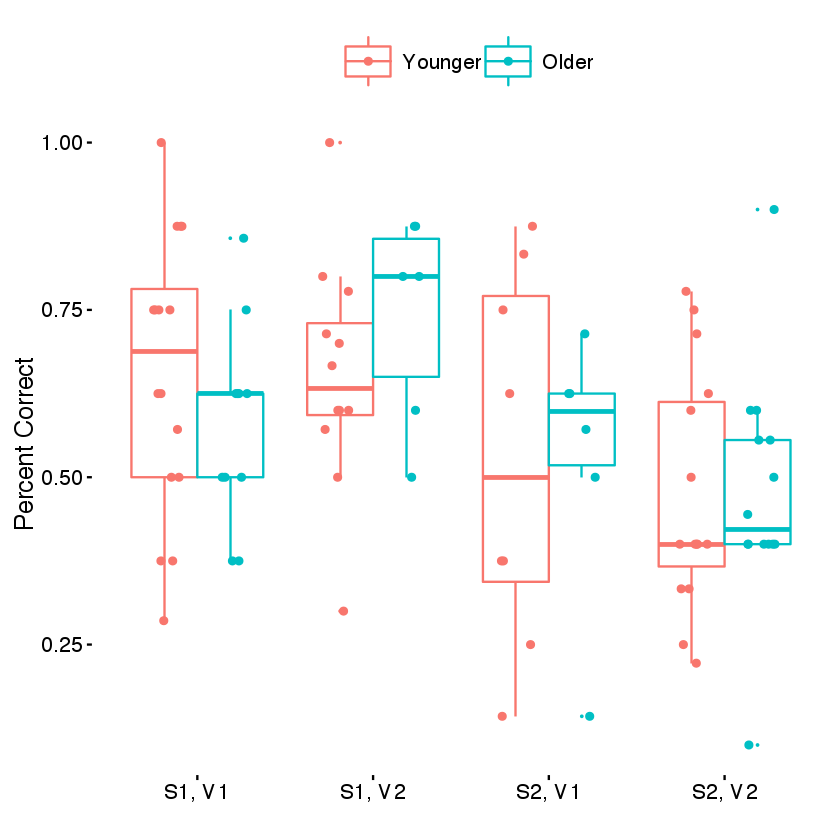

In [5]:
ggplot(aes(x = as.factor(variable),y = value, colour = as.factor(age_group)),data=wordseg.m) +
  geom_boxplot(outlier.size = 0) +
  #geom_boxplot() +
  geom_point(position = position_jitterdodge())+
  #scale_y_continuous(limits = c(0,3)) +
  scale_colour_discrete(guide = guide_legend(keywidth=2.5,keyheight=2.5), labels=c("Younger","Older")) +
  theme_classic() +
  theme(axis.title.x = element_text(),axis.title.y = element_text(),legend.background = element_blank(),
        legend.title = element_blank(),legend.position = 'top')+ 
  ylab(label = "Percent Correct")+
  scale_x_discrete("", labels=c("S1, V1","S1, V2", "S2, V1","S2, V2"))+
  theme(text = element_text(size = 15))

### Average percent correct, non words

Warning message:
: Removed 53 rows containing non-finite values (stat_density).Warning message:
: Removed 43 rows containing non-finite values (stat_density).

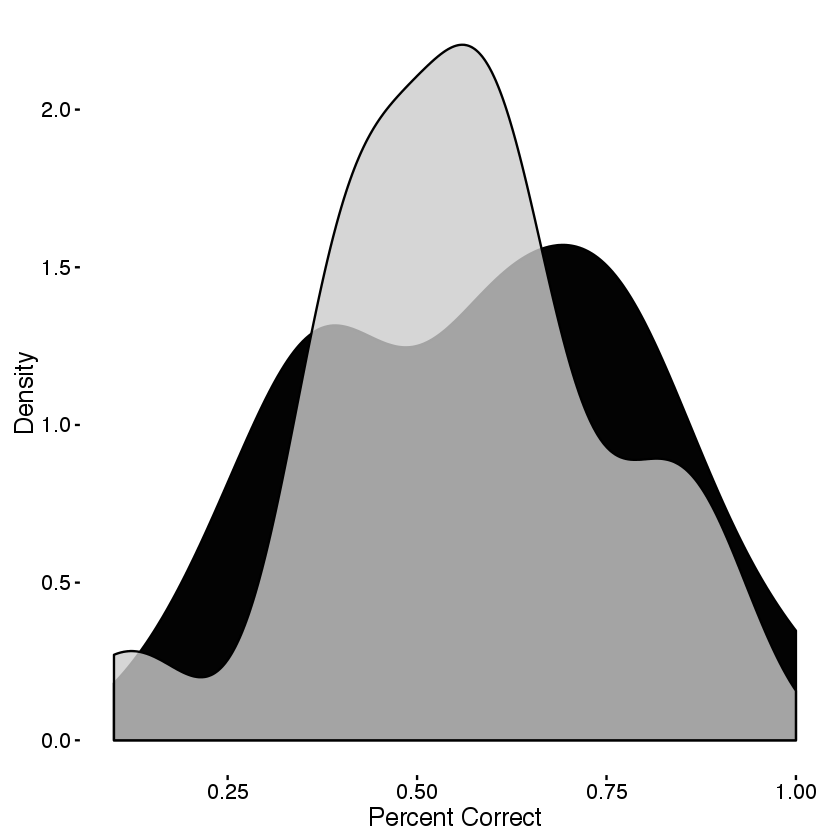

In [6]:
#histrogram
ggplot(wordseg.m, (aes(x=value)))+
  geom_density(data=subset(wordseg.m, age_group == 1),color="black", fill = "gray1")+
  geom_density(data=subset(wordseg.m, age_group == 2),color="black", fill = "gray80", alpha = .8)+
  scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic()+
  theme(text = element_text(size = 15))+
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

### Graph by session 1 and 2

In [7]:
sess_ws.m <- melt(summary,id.vars='age_group', measure.vars=c('non_w_s_1_v_all','non_w_s_2_v_all'))
head(sess_ws.m)

,age_group,variable,value
1,1,non_w_s_1_v_all,0.375
2,1,non_w_s_1_v_all,0.6
3,1,non_w_s_1_v_all,0.6
4,1,non_w_s_1_v_all,0.3
5,1,non_w_s_1_v_all,0.875
6,1,non_w_s_1_v_all,0.875


### Accuracy by Sess

Warning message:
: Removed 6 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 6 rows containing missing values (geom_point).

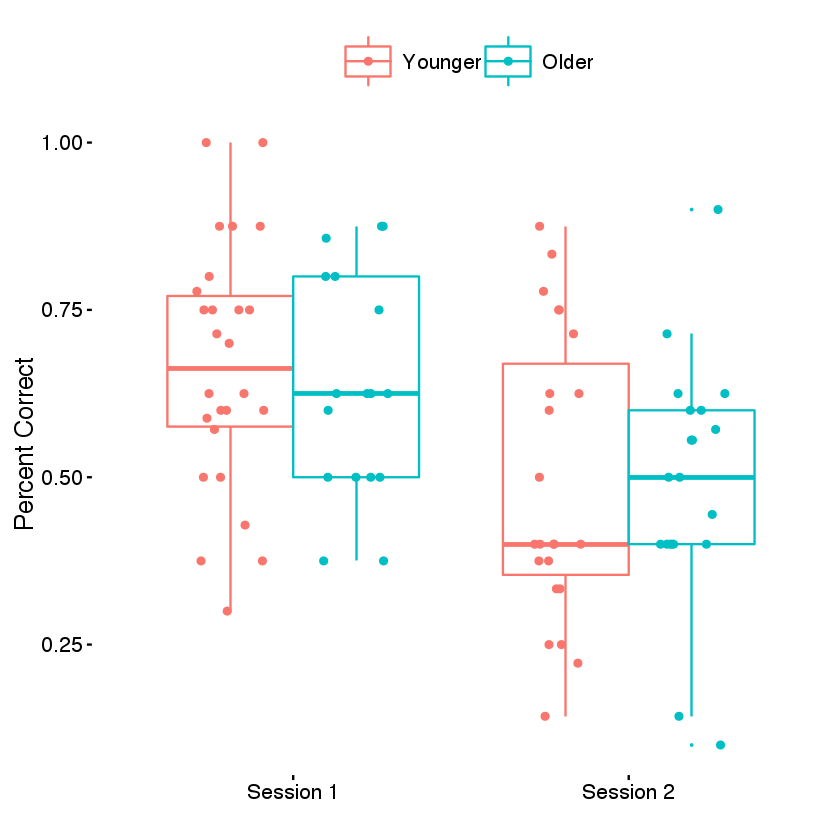

In [8]:
ggplot(aes(x = as.factor(variable),y = value, colour = as.factor(age_group)),data=sess_ws.m) +
  geom_boxplot(outlier.size = 0) +
  geom_point(position = position_jitterdodge())+
  #scale_y_continuous(limits = c(0,3)) +
  scale_colour_discrete(guide = guide_legend(keywidth=2.5,keyheight=2.5), labels=c("Younger","Older")) +
  theme_classic() +
  theme(axis.title.x = element_text(),axis.title.y = element_text(),legend.background = element_blank(),
        legend.title = element_blank(),legend.position = 'top')+ 
  ylab(label = "Percent Correct")+
  scale_x_discrete("", labels=c("Session 1","Session 2"))+
  theme(text = element_text(size = 15))

### Learning scores by session, version and age

In [9]:
#one sample t-test (regarless of version, age, session), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 3.3059, df = 87, p-value = 0.001377
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5284836 0.6143736
sample estimates:
mean of x 
0.5714286 


In [10]:
#one sample t-test session 1 all (both versions, both ages), 50% chance 
t.test(summary$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_1_v_all
t = 5.7018, df = 42, p-value = 1.065e-06
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5993501 0.7082053
sample estimates:
mean of x 
0.6537777 


In [11]:
#one sample t-test session 2 all (both versions, both ages), 50% chance 
t.test(summary$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_2_v_all
t = -0.25881, df = 42, p-value = 0.797
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4317211 0.5527566
sample estimates:
mean of x 
0.4922388 


In [12]:
#one sample t-test version 1 (both session, both ages), 50% chance
t.test(summary$non_w_s_all_v_1, mu=.5)


	One Sample t-test

data:  summary$non_w_s_all_v_1
t = 2.8049, df = 40, p-value = 0.007732
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5255191 0.6571174
sample estimates:
mean of x 
0.5913182 


In [13]:
#one sample t-test version 2 (both session, both ages), 50% chance
t.test(summary$non_w_s_all_v_2, mu=.5)


	One Sample t-test

data:  summary$non_w_s_all_v_2
t = 1.7258, df = 45, p-value = 0.09125
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4915465 0.6096440
sample estimates:
mean of x 
0.5505952 


In [14]:
#one sample t-test version 1, session 1 (both ages), 50% chance
t.test(summary$non_w_s_1_v_1, mu=.5)


	One Sample t-test

data:  summary$non_w_s_1_v_1
t = 3.4423, df = 26, p-value = 0.001964
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5498243 0.6975302
sample estimates:
mean of x 
0.6236772 


In [15]:
#one sample t-test version 2, session 1 (both ages), 50% chance
t.test(summary$non_w_s_1_v_2, mu=.5)


	One Sample t-test

data:  summary$non_w_s_1_v_2
t = 4.6037, df = 17, p-value = 0.0002531
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5987167 0.7657453
sample estimates:
mean of x 
 0.682231 


In [16]:
#one sample t-test session 1, younger (both versions)
t.test(younger$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  younger$non_w_s_1_v_all
t = 4.5457, df = 25, p-value = 0.000121
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5905641 0.7406127
sample estimates:
mean of x 
0.6655884 


In [17]:
#one sample t-test session 1, older (both versions)
t.test(older$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  older$non_w_s_1_v_all
t = 3.3669, df = 16, p-value = 0.003925
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5502641 0.7211645
sample estimates:
mean of x 
0.6357143 


In [18]:
#one sample t-test session 2, younger (both versions)
t.test(younger$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  younger$non_w_s_2_v_all
t = -0.16365, df = 22, p-value = 0.8715
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4002144 0.5851893
sample estimates:
mean of x 
0.4927019 


In [19]:
#one sample t-test session 2, older (both versions)
t.test(older$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  older$non_w_s_2_v_all
t = -0.20571, df = 19, p-value = 0.8392
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4073198 0.5760928
sample estimates:
mean of x 
0.4917063 


## Part Words Percent Correct

In [20]:
# prepare PART WORD data 
wordseg.m <- melt(summary,id.vars='age_group', measure.vars=c('part_w_s_1_v_1','part_w_s_1_v_2','part_w_s_2_v_1','part_w_s_2_v_2'))
head(wordseg.m)

,age_group,variable,value
1,1,part_w_s_1_v_1,0.25
2,1,part_w_s_1_v_1,NA
3,1,part_w_s_1_v_1,NA
4,1,part_w_s_1_v_1,NA
5,1,part_w_s_1_v_1,1
6,1,part_w_s_1_v_1,0.75


Warning message:
: Removed 96 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 96 rows containing missing values (geom_point).

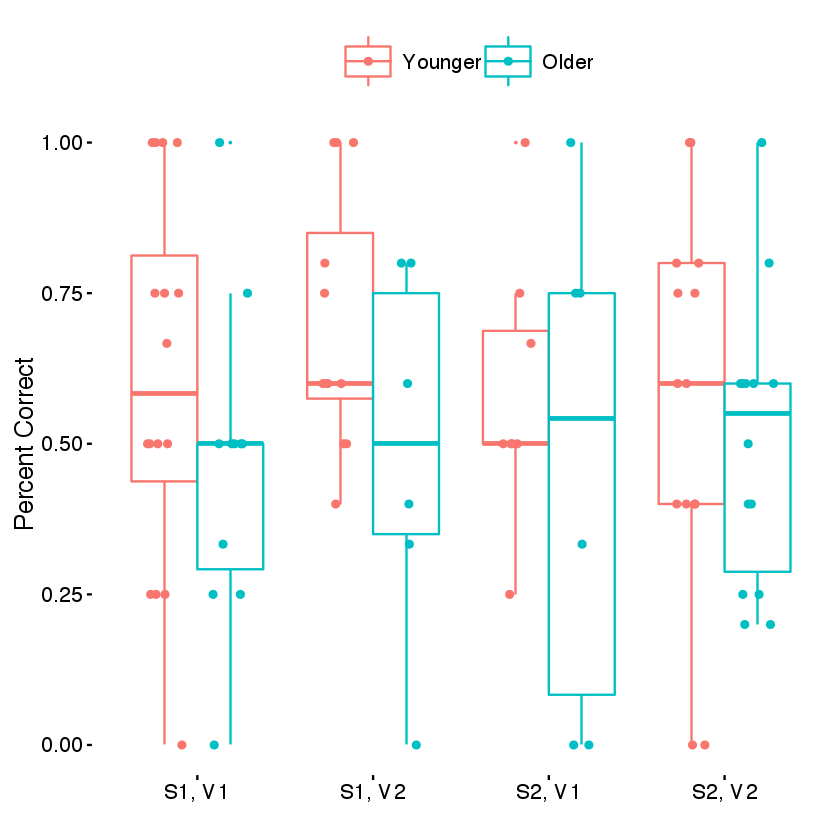

In [21]:
#accuracy by Sess and Vers
ggplot(aes(x = as.factor(variable),y = value, colour = as.factor(age_group)),data=wordseg.m) +
  geom_boxplot(outlier.size = 0) +
  geom_point(position = position_jitterdodge())+
  #scale_y_continuous(limits = c(0,3)) +
  scale_colour_discrete(guide = guide_legend(keywidth=2.5,keyheight=2.5), labels=c("Younger","Older")) +
  theme_classic() +
  theme(axis.title.x = element_text(),axis.title.y = element_text(),legend.background = element_blank(),
        legend.title = element_blank(),legend.position = 'top')+ 
  ylab(label = "Percent Correct")+
  scale_x_discrete("", labels=c("S1, V1","S1, V2", "S2, V1","S2, V2"))+
  theme(text = element_text(size = 15))

### Average percent correct

Warning message:
: Removed 53 rows containing non-finite values (stat_density).Warning message:
: Removed 43 rows containing non-finite values (stat_density).

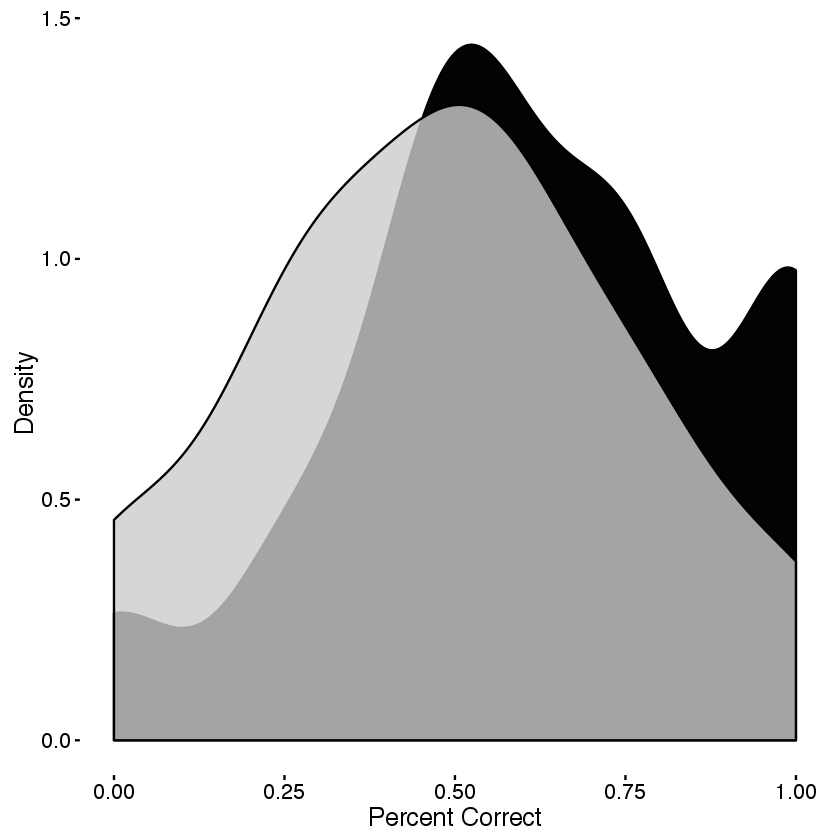

In [22]:
#histrogram
library(ggplot2)
ggplot(wordseg.m, (aes(x=value)))+
  geom_density(data=subset(wordseg.m, age_group == 1),color="black", fill = "gray1")+
  geom_density(data=subset(wordseg.m, age_group == 2),color="black", fill = "gray80", alpha = .8)+
  scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic()+
  theme(text = element_text(size = 15))+
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

### Graph by session 1 and 2

In [23]:
# prepare word seg data
sess_pw.m <- melt(summary,id.vars='age_group', measure.vars=c('part_w_s_1_v_all','part_w_s_2_v_all'))
head(sess_pw.m)

,age_group,variable,value
1,1,part_w_s_1_v_all,0.25
2,1,part_w_s_1_v_all,0.5
3,1,part_w_s_1_v_all,0.6
4,1,part_w_s_1_v_all,0.6
5,1,part_w_s_1_v_all,1
6,1,part_w_s_1_v_all,0.75


Warning message:
: Removed 6 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 6 rows containing missing values (geom_point).

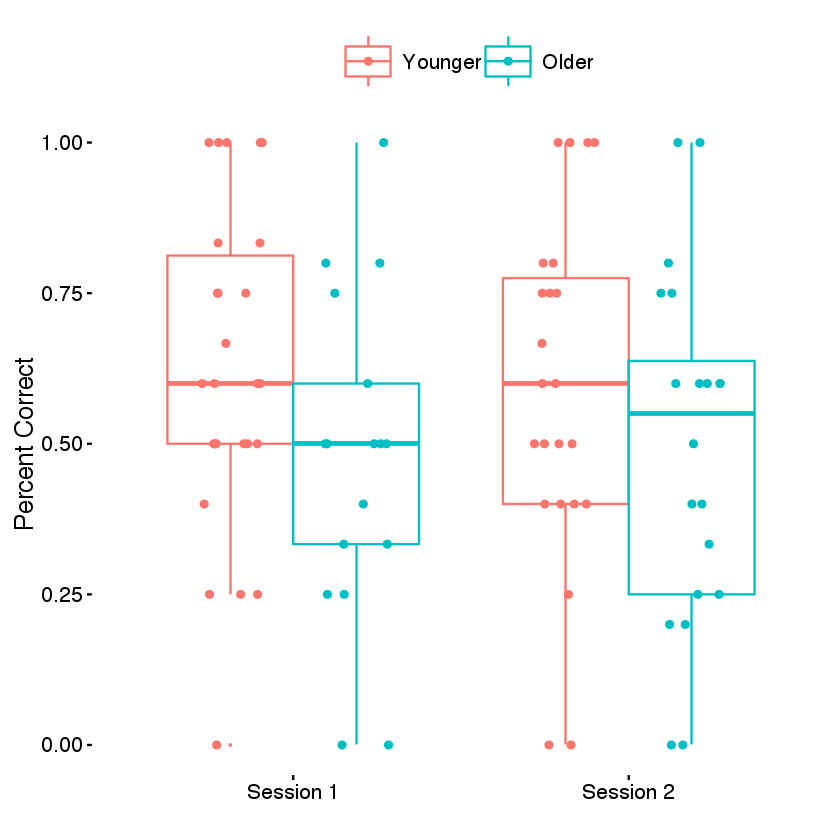

In [24]:
#accuracy by Sess and Vers
ggplot(aes(x = as.factor(variable),y = value, colour = as.factor(age_group)),data=sess_pw.m) +
  geom_boxplot(outlier.size = 0) +
  geom_point(position = position_jitterdodge())+
  #scale_y_continuous(limits = c(0,3)) +
  scale_colour_discrete(guide = guide_legend(keywidth=2.5,keyheight=2.5), labels=c("Younger","Older")) +
  theme_classic() +
  theme(axis.title.x = element_text(),axis.title.y = element_text(),legend.background = element_blank(),
        legend.title = element_blank(),legend.position = 'top')+ 
  ylab(label = "Percent Correct")+
  scale_x_discrete("", labels=c("Session 1","Session 2"))+
  theme(text = element_text(size = 15))

### Learning scores by session, version and age

In [25]:
#one sample t-test (regarless of version, age, session), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 2.0277, df = 87, p-value = 0.04565
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5012208 0.6222641
sample estimates:
mean of x 
0.5617424 


In [26]:
#one sample t-test session 1 all (both versions, both ages), 50% chance 
t.test(summary$part_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$part_w_s_1_v_all
t = 1.463, df = 42, p-value = 0.1509
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4766167 0.6466392
sample estimates:
mean of x 
0.5616279 


In [27]:
#one sample t-test session 2 all (both versions, both ages), 50% chance 
t.test(summary$part_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$part_w_s_2_v_all
t = 0.9964, df = 42, p-value = 0.3248
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4546924 0.6336797
sample estimates:
mean of x 
 0.544186 


In [28]:
#one sample t-test version 1 (both session, both ages), 50% chance
t.test(summary$part_w_s_all_v_1, mu=.5)


	One Sample t-test

data:  summary$part_w_s_all_v_1
t = 0.91115, df = 40, p-value = 0.3677
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4480055 0.6373604
sample estimates:
mean of x 
0.5426829 


In [29]:
#one sample t-test version 2 (both session, both ages), 50% chance
t.test(summary$part_w_s_all_v_2, mu=.5)


	One Sample t-test

data:  summary$part_w_s_all_v_2
t = 1.8305, df = 45, p-value = 0.0738
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4925133 0.6567620
sample estimates:
mean of x 
0.5746377 


In [30]:
#one sample t-test version 1, session 1 (both ages), 50% chance
t.test(summary$part_w_s_1_v_1, mu=.5)


	One Sample t-test

data:  summary$part_w_s_1_v_1
t = 0.80703, df = 26, p-value = 0.427
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4283787 0.6642139
sample estimates:
mean of x 
0.5462963 


In [31]:
#one sample t-test version 2, session 1 (both ages), 50% chance
t.test(summary$part_w_s_1_v_2, mu=.5)


	One Sample t-test

data:  summary$part_w_s_1_v_2
t = 2.0777, df = 17, p-value = 0.0532
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4980397 0.7556640
sample estimates:
mean of x 
0.6268519 


In [32]:
#one sample t-test session 1, younger (both versions)
t.test(younger$part_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  younger$part_w_s_1_v_all
t = 2.2918, df = 25, p-value = 0.03062
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5122112 0.7288144
sample estimates:
mean of x 
0.6205128 


In [33]:
#one sample t-test session 1, older (both versions)
t.test(older$part_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  older$part_w_s_1_v_all
t = -0.43179, df = 16, p-value = 0.6717
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.3319811 0.6111562
sample estimates:
mean of x 
0.4715686 


In [34]:
#one sample t-test session 1, younger (both versions)
t.test(younger$part_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  younger$part_w_s_2_v_all
t = 1.4933, df = 22, p-value = 0.1496
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4650654 0.7146448
sample estimates:
mean of x 
0.5898551 


In [35]:
#one sample t-test session 1, older (both versions)
t.test(older$part_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  older$part_w_s_2_v_all
t = -0.12777, df = 19, p-value = 0.8997
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.3551595 0.6281738
sample estimates:
mean of x 
0.4916667 


## order_TP33 Percent Correct

In [36]:
# prepare TP33 data 
wordseg.m <- melt(summary,id.vars='age_group', measure.vars=c('order_TP33_s_1_v_1','order_TP33_s_1_v_2','order_TP33_s_2_v_1',
                                                              'order_TP33_s_2_v_2'))
head(wordseg.m)

,age_group,variable,value
1,1,order_TP33_s_1_v_1,0.666666666667
2,1,order_TP33_s_1_v_1,NA
3,1,order_TP33_s_1_v_1,NA
4,1,order_TP33_s_1_v_1,NA
5,1,order_TP33_s_1_v_1,0.333333333333
6,1,order_TP33_s_1_v_1,0.666666666667


### Accuracy by Sess and Vers

Warning message:
: Removed 96 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 96 rows containing missing values (geom_point).

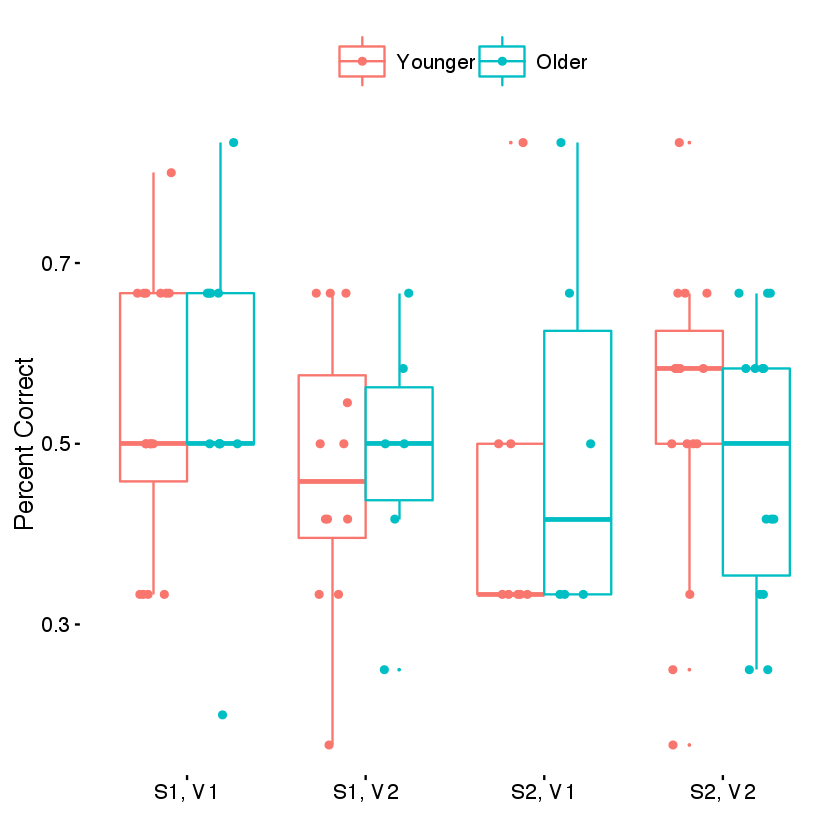

In [37]:
ggplot(aes(x = as.factor(variable),y = value, colour = as.factor(age_group)),data=wordseg.m) +
  geom_boxplot(outlier.size = 0) +
  #geom_boxplot() +
  geom_point(position = position_jitterdodge())+
  #scale_y_continuous(limits = c(0,3)) +
  scale_colour_discrete(guide = guide_legend(keywidth=2.5,keyheight=2.5), labels=c("Younger","Older")) +
  theme_classic() +
  theme(axis.title.x = element_text(),axis.title.y = element_text(),legend.background = element_blank(),
        legend.title = element_blank(),legend.position = 'top')+ 
  ylab(label = "Percent Correct")+
  scale_x_discrete("", labels=c("S1, V1","S1, V2", "S2, V1","S2, V2"))+
  theme(text = element_text(size = 15))

### Average percent correct

Warning message:
: Removed 53 rows containing non-finite values (stat_density).Warning message:
: Removed 43 rows containing non-finite values (stat_density).

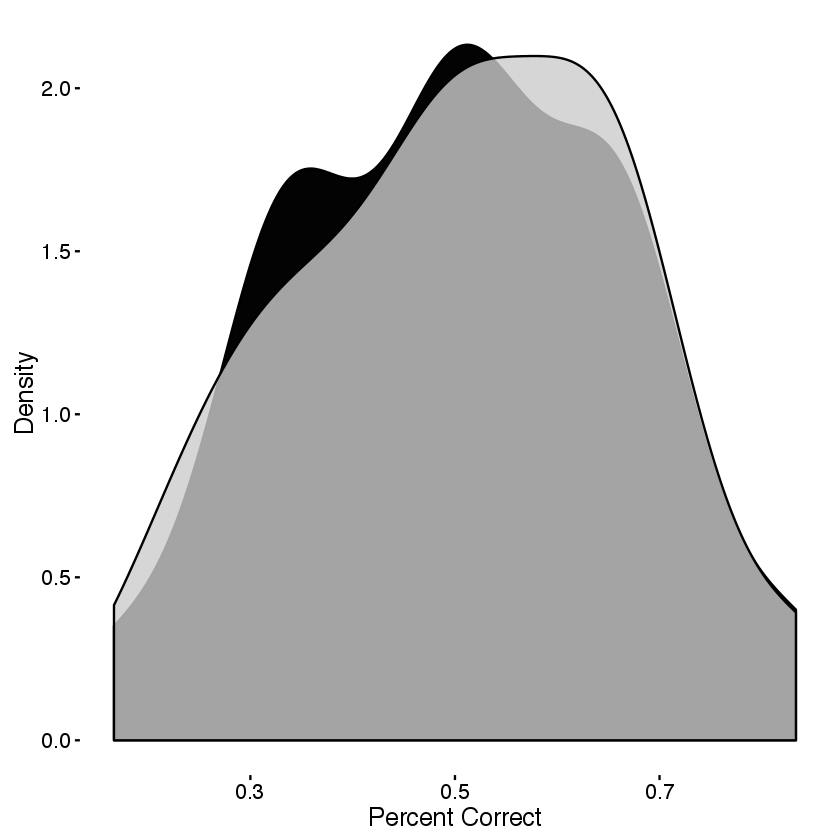

In [38]:
#histrogram
library(ggplot2)
ggplot(wordseg.m, (aes(x=value)))+
  geom_density(data=subset(wordseg.m, age_group == 1),color="black", fill = "gray1")+
  geom_density(data=subset(wordseg.m, age_group == 2),color="black", fill = "gray80", alpha = .8)+
  scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic()+
  theme(text = element_text(size = 15))+
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

### Graph by session 1 and 2

In [39]:
sess_ws.m <- melt(summary,id.vars='age_group', measure.vars=c('order_TP33_s_1_v_all','order_TP33_s_2_v_all'))
head(sess_ws.m)

,age_group,variable,value
1,1,order_TP33_s_1_v_all,0.666666666667
2,1,order_TP33_s_1_v_all,0.666666666667
3,1,order_TP33_s_1_v_all,0.416666666667
4,1,order_TP33_s_1_v_all,0.416666666667
5,1,order_TP33_s_1_v_all,0.333333333333
6,1,order_TP33_s_1_v_all,0.666666666667


### Accuracy by Session

Warning message:
: Removed 6 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 6 rows containing missing values (geom_point).

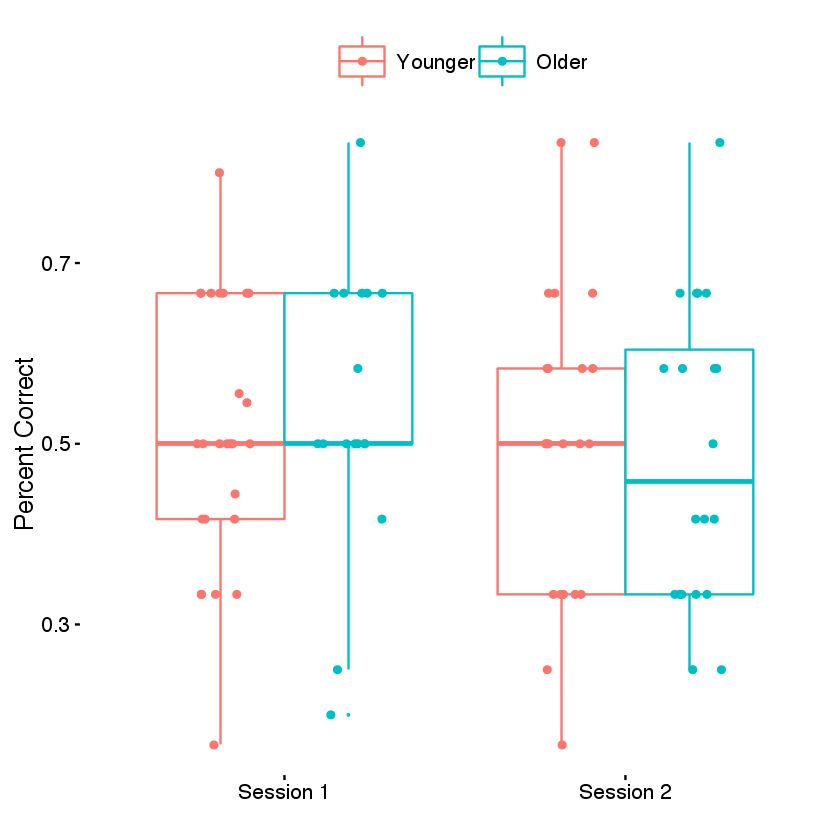

In [40]:
ggplot(aes(x = as.factor(variable),y = value, colour = as.factor(age_group)),data=sess_ws.m) +
  geom_boxplot(outlier.size = 0) +
  geom_point(position = position_jitterdodge())+
  #scale_y_continuous(limits = c(0,3)) +
  scale_colour_discrete(guide = guide_legend(keywidth=2.5,keyheight=2.5), labels=c("Younger","Older")) +
  theme_classic() +
  theme(axis.title.x = element_text(),axis.title.y = element_text(),legend.background = element_blank(),
        legend.title = element_blank(),legend.position = 'top')+ 
  ylab(label = "Percent Correct")+
  scale_x_discrete("", labels=c("Session 1","Session 2"))+
  theme(text = element_text(size = 15))

### Learning scores by session, version and age

In [41]:
#one sample t-test (regarless of version, age, session), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 0.3606, df = 87, p-value = 0.7193
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4720336 0.5403631
sample estimates:
mean of x 
0.5061983 


In [42]:
#one sample t-test session 1 all (both versions, both ages), 50% chance 
t.test(summary$order_TP33_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$order_TP33_s_1_v_all
t = 0.89859, df = 42, p-value = 0.374
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4745391 0.5663348
sample estimates:
mean of x 
0.5204369 


In [43]:
#one sample t-test session 2 all (both versions, both ages), 50% chance 
t.test(summary$order_TP33_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$order_TP33_s_2_v_all
t = -0.30001, df = 42, p-value = 0.7656
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4401036 0.5443925
sample estimates:
mean of x 
0.4922481 


In [44]:
#one sample t-test version 1 (both session, both ages), 50% chance
t.test(summary$order_TP33_s_all_v_1, mu=.5)


	One Sample t-test

data:  summary$order_TP33_s_all_v_1
t = 0.77251, df = 40, p-value = 0.4444
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4671495 0.5735009
sample estimates:
mean of x 
0.5203252 


In [45]:
#one sample t-test version 2 (both session, both ages), 50% chance
t.test(summary$order_TP33_s_all_v_2, mu=.5)


	One Sample t-test

data:  summary$order_TP33_s_all_v_2
t = -0.35178, df = 45, p-value = 0.7266
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4457261 0.5381342
sample estimates:
mean of x 
0.4919302 


In [46]:
#one sample t-test version 1, session 1 (both ages), 50% chance
t.test(summary$order_TP33_s_1_v_1, mu=.5)


	One Sample t-test

data:  summary$order_TP33_s_1_v_1
t = 1.6696, df = 26, p-value = 0.107
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4885840 0.6101815
sample estimates:
mean of x 
0.5493827 


In [47]:
#one sample t-test version 2, session 1 (both ages), 50% chance
t.test(summary$order_TP33_s_1_v_2, mu=.5)


	One Sample t-test

data:  summary$order_TP33_s_1_v_2
t = -0.73058, df = 17, p-value = 0.475
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4018219 0.5476730
sample estimates:
mean of x 
0.4747475 


In [48]:
#one sample t-test session 1, younger (both versions)
t.test(younger$order_TP33_s_1_v_all, mu=.5)


	One Sample t-test

data:  younger$order_TP33_s_1_v_all
t = 0.35203, df = 25, p-value = 0.7278
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4511000 0.5690631
sample estimates:
mean of x 
0.5100816 


In [49]:
#one sample t-test session 1, older (both versions)
t.test(older$order_TP33_s_1_v_all, mu=.5)


	One Sample t-test

data:  older$order_TP33_s_1_v_all
t = 0.95308, df = 16, p-value = 0.3547
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4555899 0.6169592
sample estimates:
mean of x 
0.5362745 


In [50]:
#one sample t-test session 1, younger (both versions)
t.test(younger$order_TP33_s_2_v_all, mu=.5)


	One Sample t-test

data:  younger$order_TP33_s_2_v_all
t = -0.099325, df = 22, p-value = 0.9218
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4207259 0.5720277
sample estimates:
mean of x 
0.4963768 


In [51]:
#one sample t-test session 1, older (both versions)
t.test(older$order_TP33_s_2_v_all, mu=.5)


	One Sample t-test

data:  older$order_TP33_s_2_v_all
t = -0.3342, df = 19, p-value = 0.7419
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4092159 0.5657841
sample estimates:
mean of x 
   0.4875 


## three_1nov_1cong Percent Correct

In [52]:
# prepare 3 1-nov,1-cong data 
wordseg.m <- melt(summary,id.vars='age_group', measure.vars=c('three_1nov_1cong_s_1_v_1','three_1nov_1cong_s_1_v_2',
                                                              'three_1nov_1cong_s_2_v_1','three_1nov_1cong_s_2_v_2'))
head(wordseg.m)

,age_group,variable,value
1,1,three_1nov_1cong_s_1_v_1,0.333333333333
2,1,three_1nov_1cong_s_1_v_1,NA
3,1,three_1nov_1cong_s_1_v_1,NA
4,1,three_1nov_1cong_s_1_v_1,NA
5,1,three_1nov_1cong_s_1_v_1,0.666666666667
6,1,three_1nov_1cong_s_1_v_1,0.555555555556


### Accuracy by Sess and Vers

Warning message:
: Removed 96 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 96 rows containing missing values (geom_point).

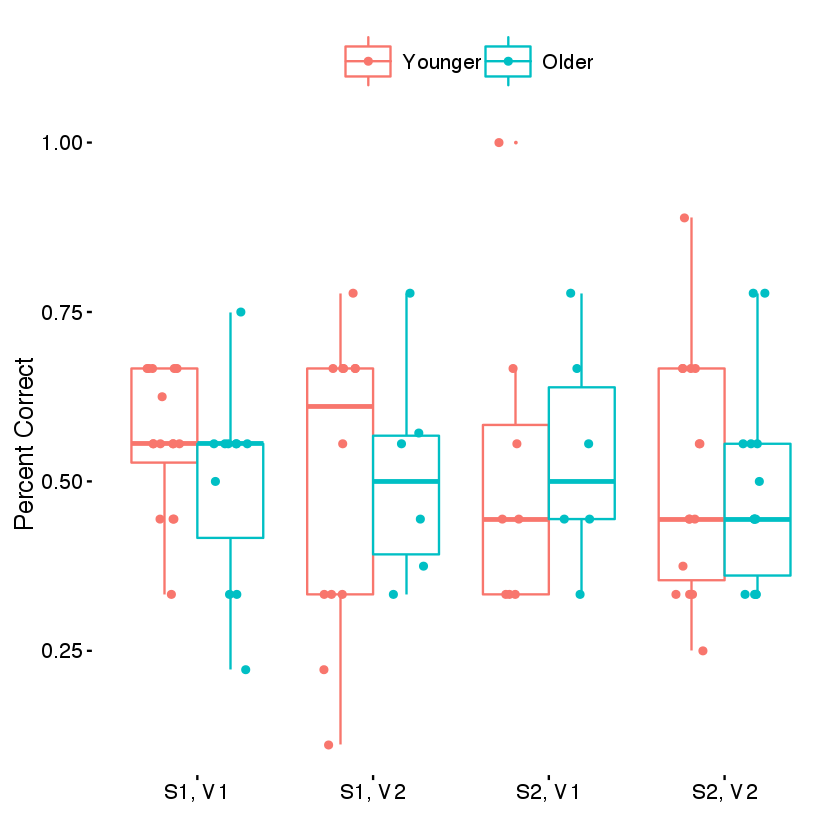

In [53]:
ggplot(aes(x = as.factor(variable),y = value, colour = as.factor(age_group)),data=wordseg.m) +
  geom_boxplot(outlier.size = 0) +
  #geom_boxplot() +
  geom_point(position = position_jitterdodge())+
  #scale_y_continuous(limits = c(0,3)) +
  scale_colour_discrete(guide = guide_legend(keywidth=2.5,keyheight=2.5), labels=c("Younger","Older")) +
  theme_classic() +
  theme(axis.title.x = element_text(),axis.title.y = element_text(),legend.background = element_blank(),
        legend.title = element_blank(),legend.position = 'top')+ 
  ylab(label = "Percent Correct")+
  scale_x_discrete("", labels=c("S1, V1","S1, V2", "S2, V1","S2, V2"))+
  theme(text = element_text(size = 15))

### Average percent correct

Warning message:
: Removed 53 rows containing non-finite values (stat_density).Warning message:
: Removed 43 rows containing non-finite values (stat_density).

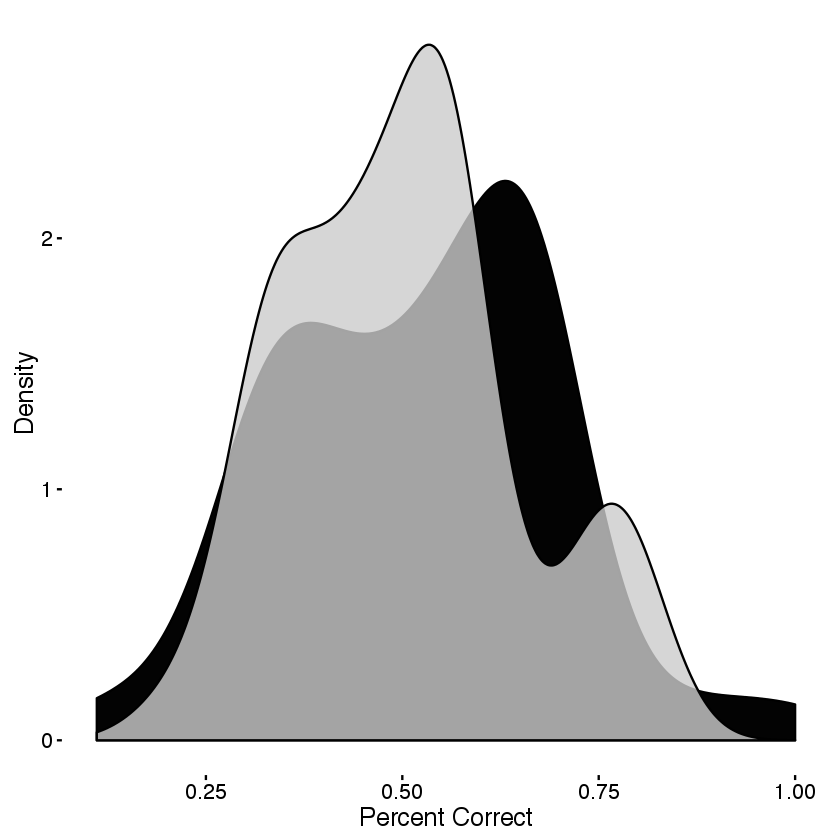

In [54]:
#histrogram
library(ggplot2)
ggplot(wordseg.m, (aes(x=value)))+
  geom_density(data=subset(wordseg.m, age_group == 1),color="black", fill = "gray1")+
  geom_density(data=subset(wordseg.m, age_group == 2),color="black", fill = "gray80", alpha = .8)+
  scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic()+
  theme(text = element_text(size = 15))+
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

### Graph by Session 1 and 2

In [55]:
sess_ws.m <- melt(summary,id.vars='age_group', measure.vars=c('three_1nov_1cong_s_1_v_all','three_1nov_1cong_s_2_v_all'))
head(sess_ws.m)

,age_group,variable,value
1,1,three_1nov_1cong_s_1_v_all,0.333333333333
2,1,three_1nov_1cong_s_1_v_all,0.555555555556
3,1,three_1nov_1cong_s_1_v_all,0.333333333333
4,1,three_1nov_1cong_s_1_v_all,0.333333333333
5,1,three_1nov_1cong_s_1_v_all,0.666666666667
6,1,three_1nov_1cong_s_1_v_all,0.555555555556


### Accuracy by Session

Warning message:
: Removed 6 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 6 rows containing missing values (geom_point).

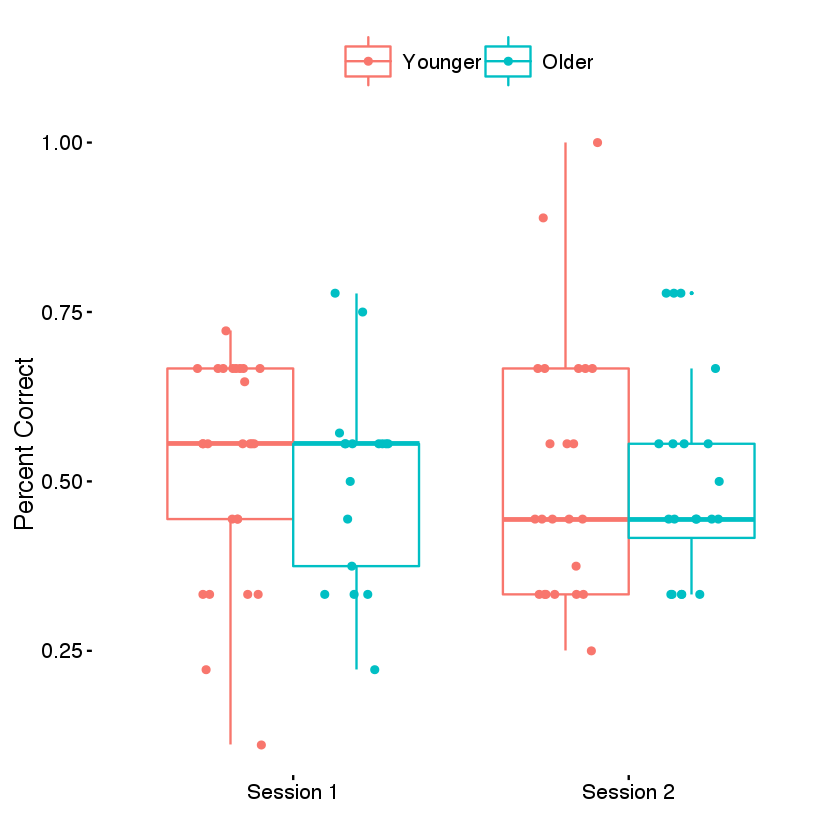

In [56]:
ggplot(aes(x = as.factor(variable),y = value, colour = as.factor(age_group)),data=sess_ws.m) +
  geom_boxplot(outlier.size = 0) +
  geom_point(position = position_jitterdodge())+
  #scale_y_continuous(limits = c(0,3)) +
  scale_colour_discrete(guide = guide_legend(keywidth=2.5,keyheight=2.5), labels=c("Younger","Older")) +
  theme_classic() +
  theme(axis.title.x = element_text(),axis.title.y = element_text(),legend.background = element_blank(),
        legend.title = element_blank(),legend.position = 'top')+ 
  ylab(label = "Percent Correct")+
  scale_x_discrete("", labels=c("Session 1","Session 2"))+
  theme(text = element_text(size = 15))

### Learning scores by session, version and age

In [57]:
#one sample t-test (regarless of version, age, session), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 0.83786, df = 87, p-value = 0.4044
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4800436 0.5490419
sample estimates:
mean of x 
0.5145427 


In [58]:
#one sample t-test session 1 all (both versions, both ages), 50% chance 
t.test(summary$three_1nov_1cong_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$three_1nov_1cong_s_1_v_all
t = 0.61394, df = 42, p-value = 0.5426
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4669558 0.5619403
sample estimates:
mean of x 
 0.514448 


In [59]:
#one sample t-test session 2 all (both versions, both ages), 50% chance 
t.test(summary$three_1nov_1cong_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$three_1nov_1cong_s_2_v_all
t = 0.25921, df = 42, p-value = 0.7967
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4539747 0.5595912
sample estimates:
mean of x 
0.5067829 


In [60]:
#one sample t-test version 1 (both session, both ages), 50% chance
t.test(summary$three_1nov_1cong_s_all_v_1, mu=.5)


	One Sample t-test

data:  summary$three_1nov_1cong_s_all_v_1
t = 1.318, df = 40, p-value = 0.195
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4835547 0.5780984
sample estimates:
mean of x 
0.5308266 


In [61]:
#one sample t-test version 2 (both session, both ages), 50% chance
t.test(summary$three_1nov_1cong_s_all_v_2, mu=.5)


	One Sample t-test

data:  summary$three_1nov_1cong_s_all_v_2
t = 0.23076, df = 45, p-value = 0.8185
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4554697 0.5560545
sample estimates:
mean of x 
0.5057621 


In [62]:
#one sample t-test version 1, session 1 (both ages), 50% chance
t.test(summary$three_1nov_1cong_s_1_v_1, mu=.5)


	One Sample t-test

data:  summary$three_1nov_1cong_s_1_v_1
t = 1.459, df = 26, p-value = 0.1565
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4859082 0.5830218
sample estimates:
mean of x 
 0.534465 


In [63]:
#one sample t-test version 2, session 1 (both ages), 50% chance
t.test(summary$three_1nov_1cong_s_1_v_2, mu=.5)


	One Sample t-test

data:  summary$three_1nov_1cong_s_1_v_2
t = 0.0687, df = 17, p-value = 0.946
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4050258 0.6013675
sample estimates:
mean of x 
0.5031966 


In [64]:
#one sample t-test session 1, younger (both versions)
t.test(younger$three_1nov_1cong_s_1_v_all, mu=.5)


	One Sample t-test

data:  younger$three_1nov_1cong_s_1_v_all
t = 0.71934, df = 25, p-value = 0.4786
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4576145 0.5878857
sample estimates:
mean of x 
0.5227501 


In [65]:
#one sample t-test session 1, older (both versions)
t.test(older$three_1nov_1cong_s_1_v_all, mu=.5)


	One Sample t-test

data:  older$three_1nov_1cong_s_1_v_all
t = 0.04912, df = 16, p-value = 0.9614
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4261947 0.5773067
sample estimates:
mean of x 
0.5017507 


In [66]:
#one sample t-test session 1, younger (both versions)
t.test(younger$three_1nov_1cong_s_2_v_all, mu=.5)


	One Sample t-test

data:  younger$three_1nov_1cong_s_2_v_all
t = 0.25703, df = 22, p-value = 0.7995
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4274347 0.5930967
sample estimates:
mean of x 
0.5102657 


In [67]:
#one sample t-test session 1, older (both versions)
t.test(older$three_1nov_1cong_s_2_v_all, mu=.5)


	One Sample t-test

data:  older$three_1nov_1cong_s_2_v_all
t = 0.082686, df = 19, p-value = 0.935
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4324642 0.5730914
sample estimates:
mean of x 
0.5027778 


## three_2nov_1cong_1incong Percent Correct

In [68]:
# prepare 3 2-nov,1-cog,1-incog data 
wordseg.m <- melt(summary,id.vars='age_group', measure.vars=c('three_2nov_1cong_1incong_s_1_v_1',
                                                              'three_2nov_1cong_1incong_s_1_v_2',
                                                              'three_2nov_1cong_1incong_s_2_v_1',
                                                              'three_2nov_1cong_1incong_s_2_v_2'))
head(wordseg.m)

,age_group,variable,value
1,1,three_2nov_1cong_1incong_s_1_v_1,0.6
2,1,three_2nov_1cong_1incong_s_1_v_1,NA
3,1,three_2nov_1cong_1incong_s_1_v_1,NA
4,1,three_2nov_1cong_1incong_s_1_v_1,NA
5,1,three_2nov_1cong_1incong_s_1_v_1,0.5
6,1,three_2nov_1cong_1incong_s_1_v_1,0.666666666667


### Accuracy by Session and Version

Warning message:
: Removed 96 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 96 rows containing missing values (geom_point).

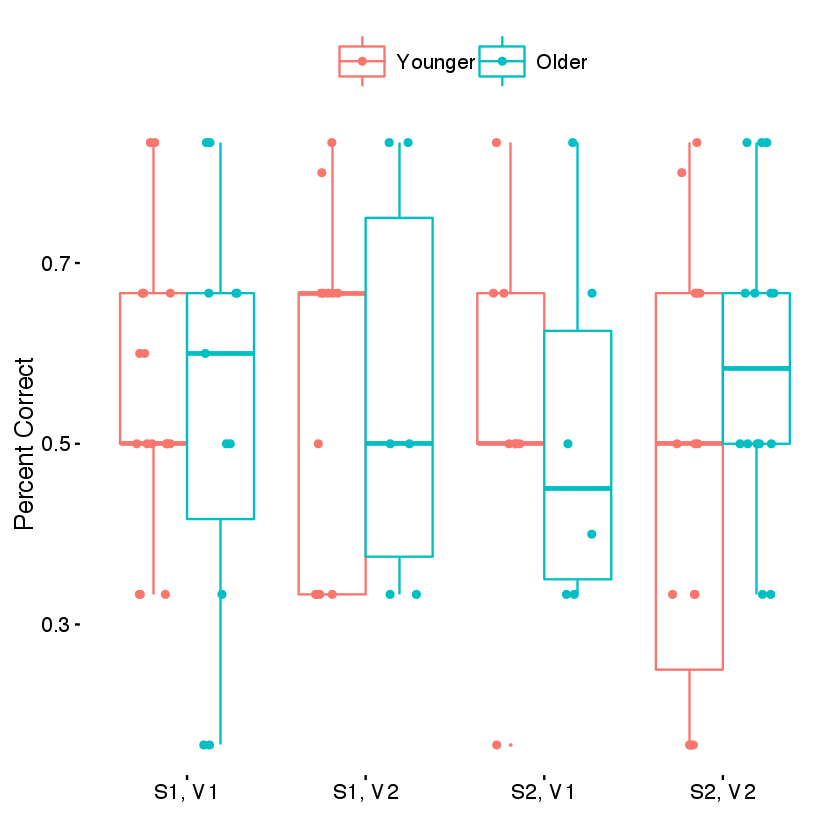

In [69]:
ggplot(aes(x = as.factor(variable),y = value, colour = as.factor(age_group)),data=wordseg.m) +
  geom_boxplot(outlier.size = 0) +
  #geom_boxplot() +
  geom_point(position = position_jitterdodge())+
  #scale_y_continuous(limits = c(0,3)) +
  scale_colour_discrete(guide = guide_legend(keywidth=2.5,keyheight=2.5), labels=c("Younger","Older")) +
  theme_classic() +
  theme(axis.title.x = element_text(),axis.title.y = element_text(),legend.background = element_blank(),
        legend.title = element_blank(),legend.position = 'top')+ 
  ylab(label = "Percent Correct")+
  scale_x_discrete("", labels=c("S1, V1","S1, V2", "S2, V1","S2, V2"))+
  theme(text = element_text(size = 15))

### Average Percent Correct

Warning message:
: Removed 53 rows containing non-finite values (stat_density).Warning message:
: Removed 43 rows containing non-finite values (stat_density).

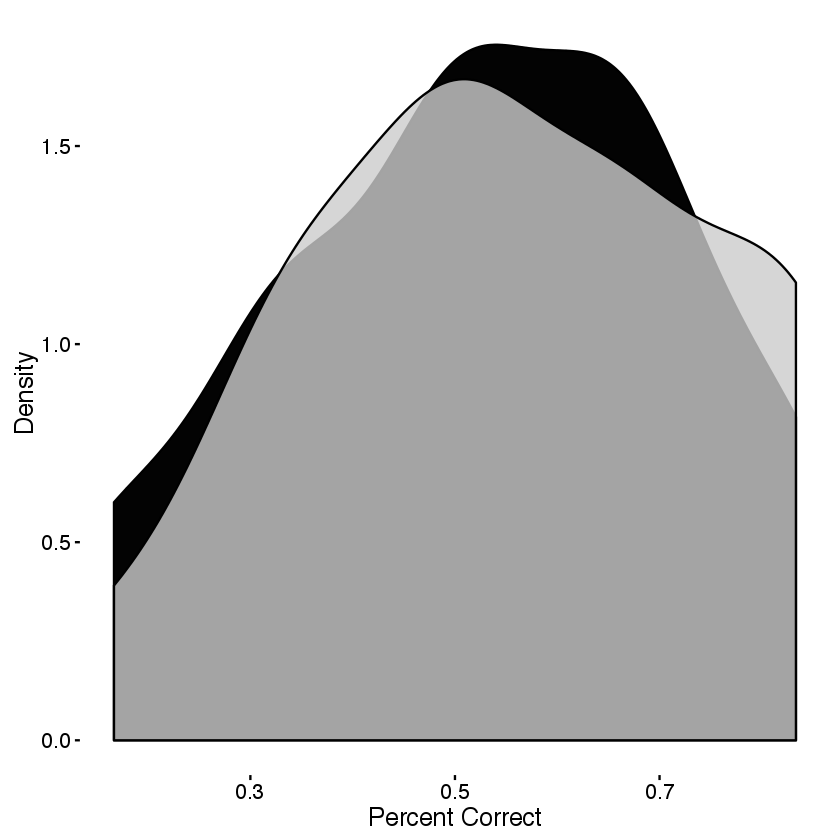

In [70]:
#histrogram
library(ggplot2)
ggplot(wordseg.m, (aes(x=value)))+
  geom_density(data=subset(wordseg.m, age_group == 1),color="black", fill = "gray1")+
  geom_density(data=subset(wordseg.m, age_group == 2),color="black", fill = "gray80", alpha = .8)+
  scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic()+
  theme(text = element_text(size = 15))+
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

### Graph by session 1 and 2

In [71]:
sess_ws.m <- melt(summary,id.vars='age_group', measure.vars=c('three_2nov_1cong_1incong_s_1_v_all',
                                                              'three_2nov_1cong_1incong_s_2_v_all'))
head(sess_ws.m)

,age_group,variable,value
1,1,three_2nov_1cong_1incong_s_1_v_all,0.6
2,1,three_2nov_1cong_1incong_s_1_v_all,0.5
3,1,three_2nov_1cong_1incong_s_1_v_all,0.833333333333
4,1,three_2nov_1cong_1incong_s_1_v_all,0.666666666667
5,1,three_2nov_1cong_1incong_s_1_v_all,0.5
6,1,three_2nov_1cong_1incong_s_1_v_all,0.666666666667


### Accuracy by session

Warning message:
: Removed 6 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 6 rows containing missing values (geom_point).

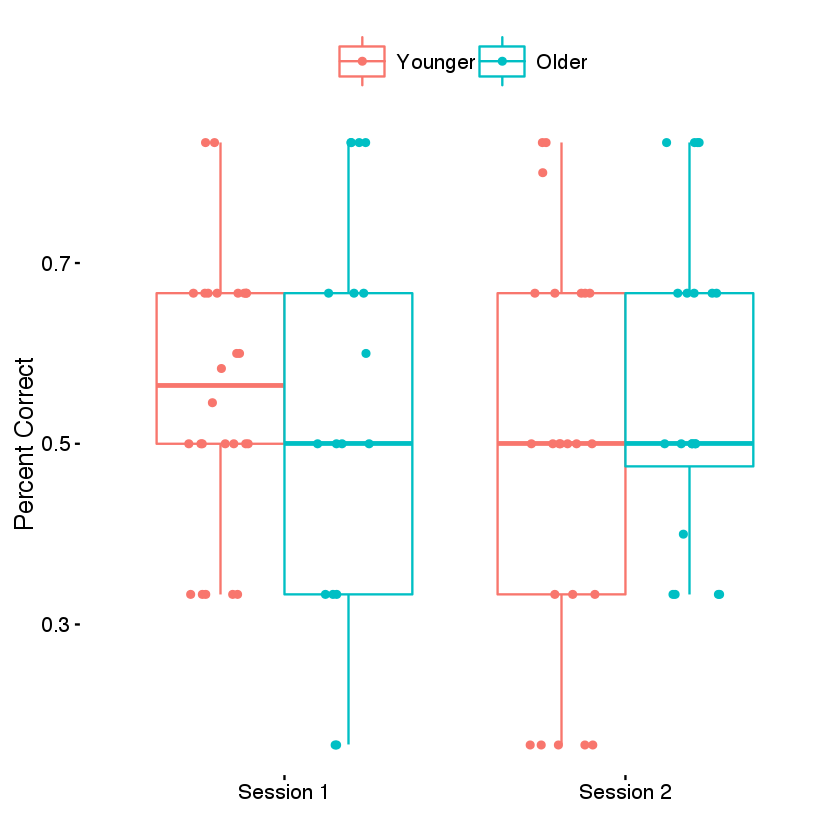

In [72]:
ggplot(aes(x = as.factor(variable),y = value, colour = as.factor(age_group)),data=sess_ws.m) +
  geom_boxplot(outlier.size = 0) +
  geom_point(position = position_jitterdodge())+
  #scale_y_continuous(limits = c(0,3)) +
  scale_colour_discrete(guide = guide_legend(keywidth=2.5,keyheight=2.5), labels=c("Younger","Older")) +
  theme_classic() +
  theme(axis.title.x = element_text(),axis.title.y = element_text(),legend.background = element_blank(),
        legend.title = element_blank(),legend.position = 'top')+ 
  ylab(label = "Percent Correct")+
  scale_x_discrete("", labels=c("Session 1","Session 2"))+
  theme(text = element_text(size = 15))

### Learning scores by session, version and age

In [73]:
#one sample t-test (regarless of version, age, session), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 1.8801, df = 87, p-value = 0.06344
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4977475 0.5810404
sample estimates:
mean of x 
0.5393939 


In [74]:
#one sample t-test session 1 all (both versions, both ages), 50% chance 
t.test(summary$three_2nov_1cong_1incong_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$three_2nov_1cong_1incong_s_1_v_all
t = 1.9337, df = 42, p-value = 0.05991
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4977049 0.6075100
sample estimates:
mean of x 
0.5526075 


In [75]:
#one sample t-test session 2 all (both versions, both ages), 50% chance 
t.test(summary$three_2nov_1cong_1incong_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$three_2nov_1cong_1incong_s_2_v_all
t = 0.7677, df = 42, p-value = 0.447
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4608598 0.5872022
sample estimates:
mean of x 
 0.524031 


In [76]:
#one sample t-test version 1 (both session, both ages), 50% chance
t.test(summary$three_2nov_1cong_1incong_s_all_v_1, mu=.5)


	One Sample t-test

data:  summary$three_2nov_1cong_1incong_s_all_v_1
t = 1.4262, df = 40, p-value = 0.1616
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4827050 0.6002219
sample estimates:
mean of x 
0.5414634 


In [77]:
#one sample t-test version 2 (both session, both ages), 50% chance
t.test(summary$three_2nov_1cong_1incong_s_all_v_2, mu=.5)


	One Sample t-test

data:  summary$three_2nov_1cong_1incong_s_all_v_2
t = 1.3117, df = 45, p-value = 0.1963
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4784650 0.6019698
sample estimates:
mean of x 
0.5402174 


In [78]:
#one sample t-test version 1, session 1 (both ages), 50% chance
t.test(summary$three_2nov_1cong_1incong_s_1_v_1, mu=.5)


	One Sample t-test

data:  summary$three_2nov_1cong_1incong_s_1_v_1
t = 1.3359, df = 26, p-value = 0.1931
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4740654 0.6222309
sample estimates:
mean of x 
0.5481481 


In [79]:
#one sample t-test version 2, session 1 (both ages), 50% chance
t.test(summary$three_2nov_1cong_1incong_s_1_v_2, mu=.5)


	One Sample t-test

data:  summary$three_2nov_1cong_1incong_s_1_v_2
t = 1.3583, df = 17, p-value = 0.1921
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4651623 0.6607636
sample estimates:
mean of x 
 0.562963 


In [80]:
#one sample t-test session 1, younger (both versions)
t.test(younger$three_2nov_1cong_1incong_s_1_v_all, mu=.5)


	One Sample t-test

data:  younger$three_2nov_1cong_1incong_s_1_v_all
t = 2.0213, df = 25, p-value = 0.05408
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4989115 0.6161235
sample estimates:
mean of x 
0.5575175 


In [81]:
#one sample t-test session 1, older (both versions)
t.test(older$three_2nov_1cong_1incong_s_1_v_all, mu=.5)


	One Sample t-test

data:  older$three_2nov_1cong_1incong_s_1_v_all
t = 0.82705, df = 16, p-value = 0.4204
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4295024 0.6606937
sample estimates:
mean of x 
 0.545098 


In [82]:
#one sample t-test session 1, younger (both versions)
t.test(younger$three_2nov_1cong_1incong_s_2_v_all, mu=.5)


	One Sample t-test

data:  younger$three_2nov_1cong_1incong_s_2_v_all
t = -0.34441, df = 22, p-value = 0.7338
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.3880621 0.5800538
sample estimates:
mean of x 
 0.484058 


In [83]:
#one sample t-test session 1, older (both versions)
t.test(older$three_2nov_1cong_1incong_s_2_v_all, mu=.5)


	One Sample t-test

data:  older$three_2nov_1cong_1incong_s_2_v_all
t = 1.7522, df = 19, p-value = 0.09586
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4863862 0.6536138
sample estimates:
mean of x 
     0.57 


## three_2nov_2cong Percent Correct

In [84]:
# prepare 3 2-nov,2-cog data 
wordseg.m <- melt(summary,id.vars='age_group', measure.vars=c('three_2nov_2cong_s_1_v_1', 'three_2nov_2cong_s_1_v_2',
                                                              'three_2nov_2cong_s_2_v_1', 'three_2nov_2cong_s_2_v_2'))
head(wordseg.m)

,age_group,variable,value
1,1,three_2nov_2cong_s_1_v_1,0.5
2,1,three_2nov_2cong_s_1_v_1,NA
3,1,three_2nov_2cong_s_1_v_1,NA
4,1,three_2nov_2cong_s_1_v_1,NA
5,1,three_2nov_2cong_s_1_v_1,0.5
6,1,three_2nov_2cong_s_1_v_1,0.666666666667


### Accuracy by Session and Version

Warning message:
: Removed 96 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 96 rows containing missing values (geom_point).

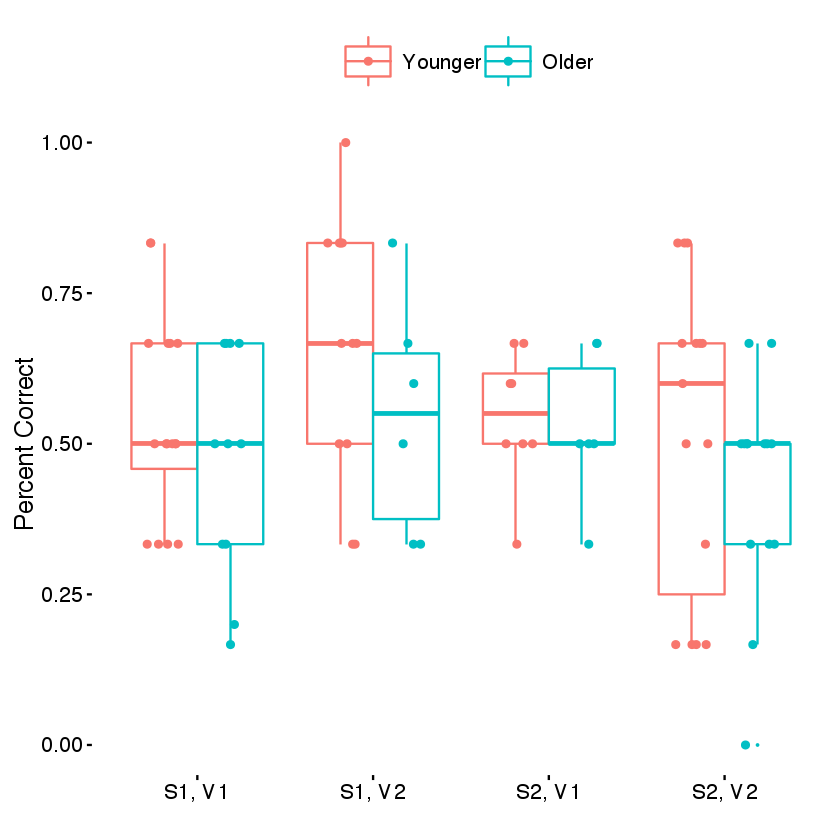

In [85]:
ggplot(aes(x = as.factor(variable),y = value, colour = as.factor(age_group)),data=wordseg.m) +
  geom_boxplot(outlier.size = 0) +
  #geom_boxplot() +
  geom_point(position = position_jitterdodge())+
  #scale_y_continuous(limits = c(0,3)) +
  scale_colour_discrete(guide = guide_legend(keywidth=2.5,keyheight=2.5), labels=c("Younger","Older")) +
  theme_classic() +
  theme(axis.title.x = element_text(),axis.title.y = element_text(),legend.background = element_blank(),
        legend.title = element_blank(),legend.position = 'top')+ 
  ylab(label = "Percent Correct")+
  scale_x_discrete("", labels=c("S1, V1","S1, V2", "S2, V1","S2, V2"))+
  theme(text = element_text(size = 15))

### Average percent correct

Warning message:
: Removed 53 rows containing non-finite values (stat_density).Warning message:
: Removed 43 rows containing non-finite values (stat_density).

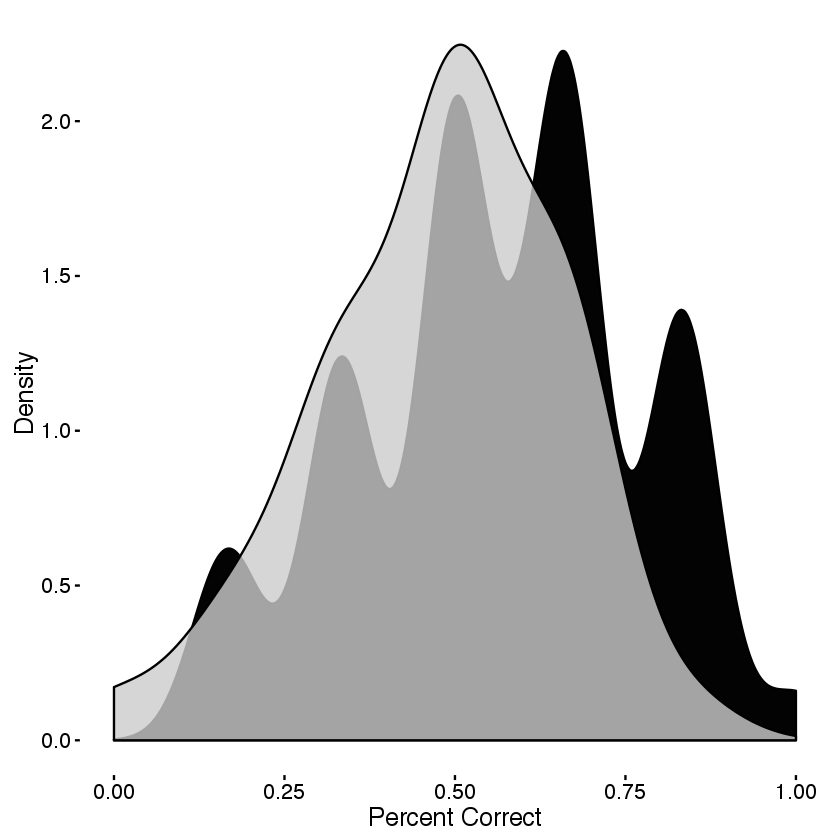

In [86]:
#histrogram
library(ggplot2)
ggplot(wordseg.m, (aes(x=value)))+
  geom_density(data=subset(wordseg.m, age_group == 1),color="black", fill = "gray1")+
  geom_density(data=subset(wordseg.m, age_group == 2),color="black", fill = "gray80", alpha = .8)+
  scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic()+
  theme(text = element_text(size = 15))+
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

### Graph by session 1 and 2

In [87]:
sess_ws.m <- melt(summary,id.vars='age_group', measure.vars=c('three_2nov_2cong_s_1_v_all',
                                                              'three_2nov_2cong_s_2_v_all'))
head(sess_ws.m)

,age_group,variable,value
1,1,three_2nov_2cong_s_1_v_all,0.5
2,1,three_2nov_2cong_s_1_v_all,0.833333333333
3,1,three_2nov_2cong_s_1_v_all,0.666666666667
4,1,three_2nov_2cong_s_1_v_all,0.833333333333
5,1,three_2nov_2cong_s_1_v_all,0.5
6,1,three_2nov_2cong_s_1_v_all,0.666666666667


### Accuracy by Session

Warning message:
: Removed 6 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 6 rows containing missing values (geom_point).

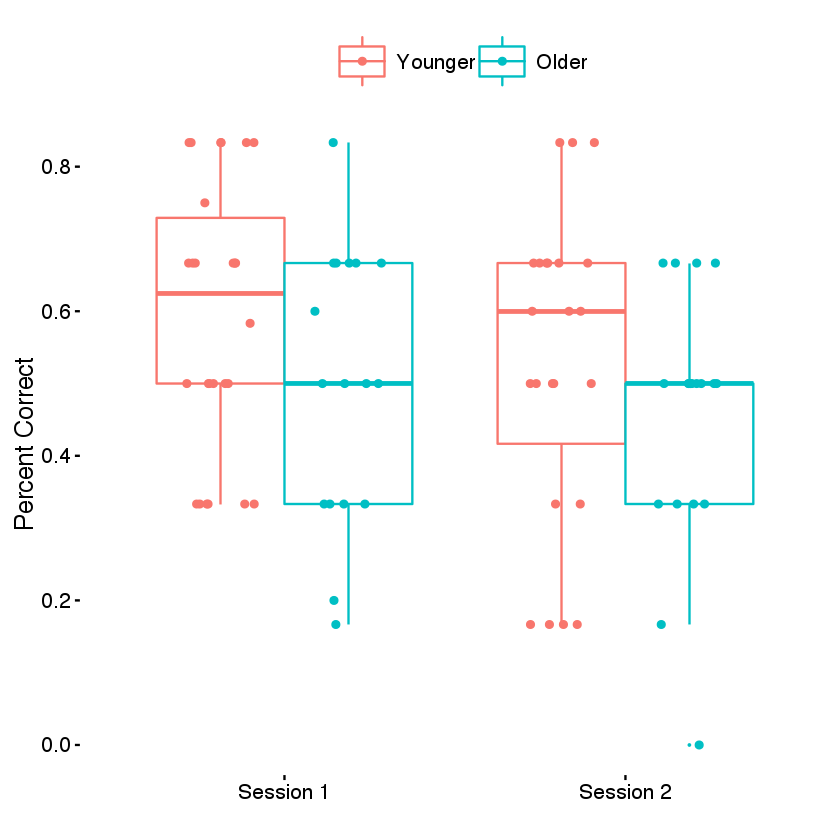

In [88]:
ggplot(aes(x = as.factor(variable),y = value, colour = as.factor(age_group)),data=sess_ws.m) +
  geom_boxplot(outlier.size = 0) +
  geom_point(position = position_jitterdodge())+
  #scale_y_continuous(limits = c(0,3)) +
  scale_colour_discrete(guide = guide_legend(keywidth=2.5,keyheight=2.5), labels=c("Younger","Older")) +
  theme_classic() +
  theme(axis.title.x = element_text(),axis.title.y = element_text(),legend.background = element_blank(),
        legend.title = element_blank(),legend.position = 'top')+ 
  ylab(label = "Percent Correct")+
  scale_x_discrete("", labels=c("Session 1","Session 2"))+
  theme(text = element_text(size = 15))

### Learning scores by session, version and age

In [89]:
#one sample t-test (regarless of version, age, session), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 1.3129, df = 87, p-value = 0.1927
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4857898 0.5695132
sample estimates:
mean of x 
0.5276515 


In [90]:
#one sample t-test session 1 all (both versions, both ages), 50% chance 
t.test(summary$three_2nov_2cong_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$three_2nov_2cong_s_1_v_all
t = 1.8445, df = 42, p-value = 0.07216
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4949679 0.6120088
sample estimates:
mean of x 
0.5534884 


In [91]:
#one sample t-test session 2 all (both versions, both ages), 50% chance 
t.test(summary$three_2nov_2cong_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$three_2nov_2cong_s_2_v_all
t = -0.15566, df = 42, p-value = 0.877
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4350489 0.5556488
sample estimates:
mean of x 
0.4953488 


In [92]:
#one sample t-test version 1 (both session, both ages), 50% chance
t.test(summary$three_2nov_2cong_s_all_v_1, mu=.5)


	One Sample t-test

data:  summary$three_2nov_2cong_s_all_v_1
t = 0.89838, df = 40, p-value = 0.3744
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4725678 0.5713347
sample estimates:
mean of x 
0.5219512 


In [93]:
#one sample t-test version 2 (both session, both ages), 50% chance
t.test(summary$three_2nov_2cong_s_all_v_2, mu=.5)


	One Sample t-test

data:  summary$three_2nov_2cong_s_all_v_2
t = 0.92615, df = 45, p-value = 0.3593
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4629709 0.6000725
sample estimates:
mean of x 
0.5315217 


In [94]:
#one sample t-test version 1, session 1 (both ages), 50% chance
t.test(summary$three_2nov_2cong_s_1_v_1, mu=.5)


	One Sample t-test

data:  summary$three_2nov_2cong_s_1_v_1
t = 0.40047, df = 26, p-value = 0.6921
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4438763 0.5832842
sample estimates:
mean of x 
0.5135802 


In [95]:
#one sample t-test version 2, session 1 (both ages), 50% chance
t.test(summary$three_2nov_2cong_s_1_v_2, mu=.5)


	One Sample t-test

data:  summary$three_2nov_2cong_s_1_v_2
t = 2.5396, df = 17, p-value = 0.02116
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5213113 0.7305406
sample estimates:
mean of x 
0.6259259 


In [96]:
#one sample t-test session 1, younger (both versions)
t.test(younger$three_2nov_2cong_s_1_v_all, mu=.5)


	One Sample t-test

data:  younger$three_2nov_2cong_s_1_v_all
t = 2.4672, df = 25, p-value = 0.02082
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5148278 0.6646594
sample estimates:
mean of x 
0.5897436 


In [97]:
#one sample t-test session 1, older (both versions)
t.test(older$three_2nov_2cong_s_1_v_all, mu=.5)


	One Sample t-test

data:  older$three_2nov_2cong_s_1_v_all
t = -0.042752, df = 16, p-value = 0.9664
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4008116 0.5952668
sample estimates:
mean of x 
0.4980392 


In [98]:
#one sample t-test session 2 all (both versions, younger), 50% chance 
t.test(younger$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  younger$non_w_s_2_v_all
t = -0.16365, df = 22, p-value = 0.8715
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4002144 0.5851893
sample estimates:
mean of x 
0.4927019 


In [99]:
#one sample t-test session 2 all (both versions, older), 50% chance 
t.test(older$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  older$non_w_s_2_v_all
t = -0.20571, df = 19, p-value = 0.8392
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4073198 0.5760928
sample estimates:
mean of x 
0.4917063 


# CONDITION AND SESSION

### Non words percent correct

In [100]:
wordseg.m <- melt(summary,id.vars='condition', measure.vars=c('non_w_s_1_v_all','non_w_s_2_v_all'))

head(wordseg.m)

,condition,variable,value
1,QW,non_w_s_1_v_all,0.375
2,QW,non_w_s_1_v_all,0.6
3,QW,non_w_s_1_v_all,0.6
4,QW,non_w_s_1_v_all,0.3
5,QW,non_w_s_1_v_all,0.875
6,QW,non_w_s_1_v_all,0.875


### Accuracy by Session

Warning message:
: Removed 6 rows containing non-finite values (stat_boxplot).Warning message:
: Removed 6 rows containing missing values (geom_point).

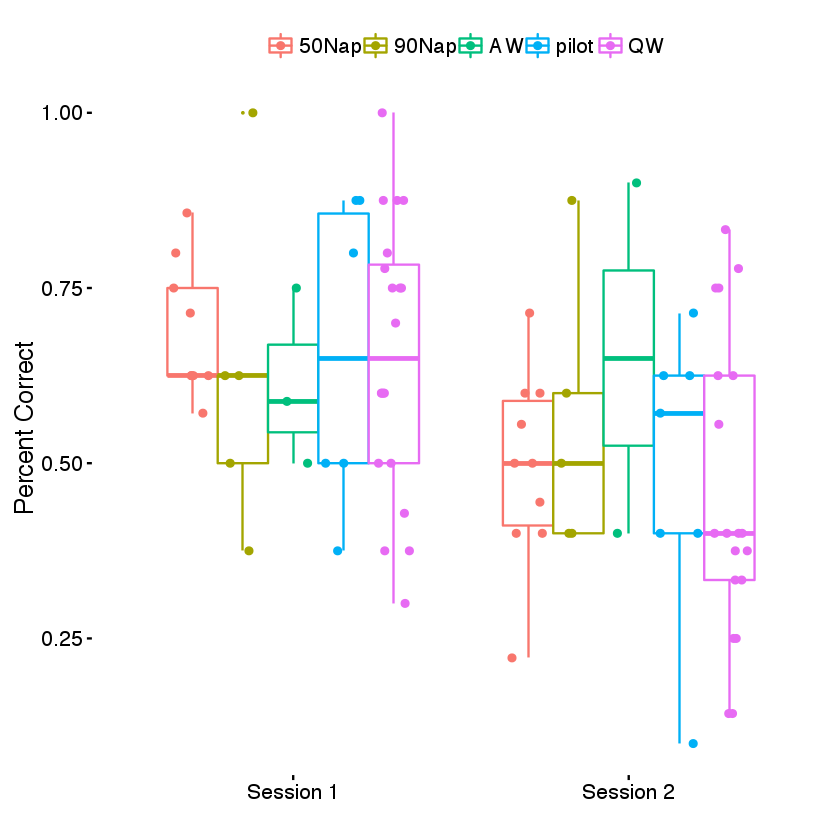

In [101]:
sess_ws.m <- melt(summary,id.vars='condition', measure.vars=c('non_w_s_1_v_all','non_w_s_2_v_all'))
#accuracy by Sess and Vers
library(Hmisc)
library(ggplot2)
ggplot(aes(x = as.factor(variable),y = value, colour = as.factor(condition)),data=sess_ws.m) +
  geom_boxplot(outlier.size = 0) +
  geom_point(position = position_jitterdodge())+
  #scale_y_continuous(limits = c(0,3)) +
  #scale_colour_discrete(guide = guide_legend(keywidth=2.5,keyheight=2.5), labels=c("Younger","Older")) +
  theme_classic() +
  theme(axis.title.x = element_text(),axis.title.y = element_text(),
        legend.background = element_blank(),legend.title = element_blank(),legend.position = 'top')+ 
  ylab(label = "Percent Correct")+
  scale_x_discrete("", labels=c("Session 1","Session 2"))+
  theme(text = element_text(size = 15))


### Average Percent Correct, non words

Warning message:
: Removed 1 rows containing non-finite values (stat_density).Warning message:
: Removed 1 rows containing non-finite values (stat_density).Warning message:
: Removed 1 rows containing non-finite values (stat_density).Warning message:
: Removed 3 rows containing non-finite values (stat_density).

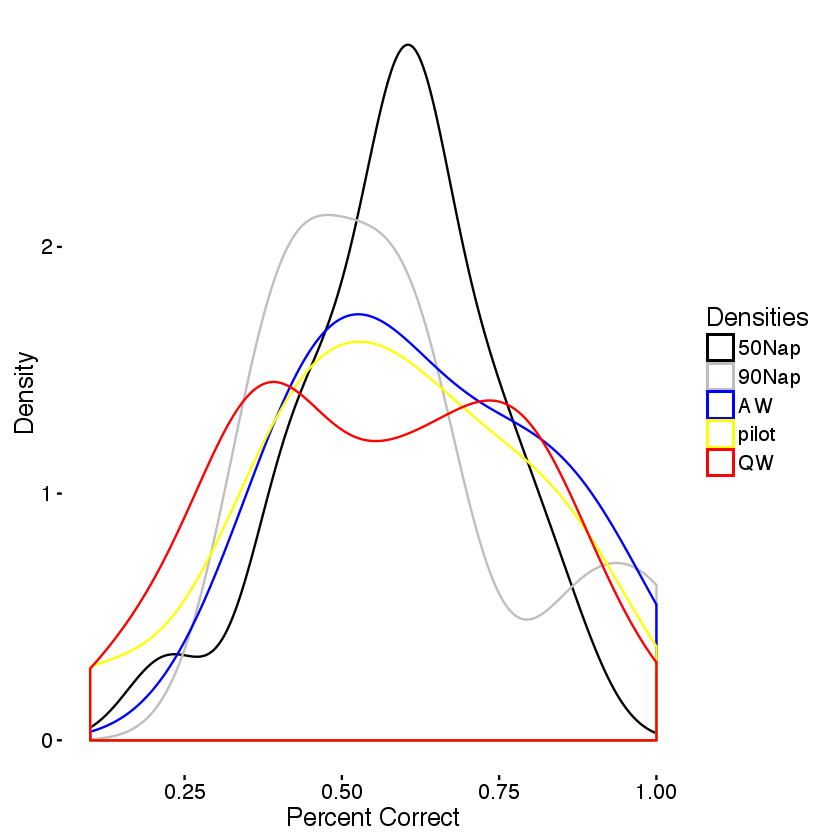

In [102]:
m <- ggplot(wordseg.m, aes(x = value))
m + geom_density(data=subset(wordseg.m, condition == '50Nap'), aes(colour="50Nap"))+
geom_density(data=subset(wordseg.m, condition == '90Nap'), aes(colour="90Nap"))+
geom_density(data=subset(wordseg.m, condition == 'AW'), aes(colour="AW"))+
geom_density(data=subset(wordseg.m, condition == 'pilot'), aes(colour="pilot"))+
geom_density(data=subset(wordseg.m, condition == 'QW'), aes(colour="QW"))+
scale_colour_manual(values=c("50Nap"="black", "90Nap"="grey", "AW"="blue", "pilot"="yellow", "QW"="red"), name="Densities") +
scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic()+
  theme(text = element_text(size = 15))+
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))